<a href="https://colab.research.google.com/github/doloresgarro/Deep-Learning/blob/main/Pr%C3%A1ctica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 2 - Deep learning**
*Perceptrón*

# **Ejercicio 2**

 *a) Utilice los ejemplos del archivo hojas.csv para entrenar un perceptrón que permita reconocer cuando se trata de una hoja de helecho. Utilice una velocidad de aprendizaje (parámetro alfa) de 0.01 y una máxima cantidad de iteraciones MAX_ITE=300.*

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing

import time
#rom matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassPerceptron import Perceptron

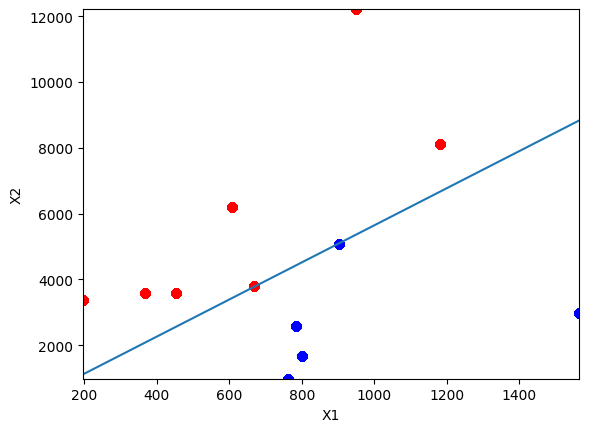

Numero de aciertos: 12.00
% Cantidad de aciertos: 100.00 %


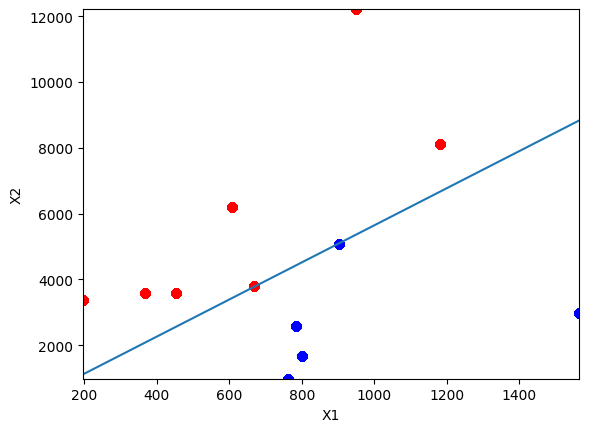

In [ ]:
# leer hojas.csv
datos = pd.read_csv("hojas.csv")
nColum = list(datos.columns.values)
print (datos)

#--- DATOS DE ENTRENAMIENTO ---
X = np.array(datos.iloc[:,0:2]) # --> entrada (toma primeras dos columnas)

#--- SALIDA BINARIA ---
T = datos ['Clase'] == 'Hoja' # Hoja = 1, Helecho = 0
T = np.array(T * 1) # convierte a binario

alfa = 0.01  # velocidad de aprendizaje
MAX_ITE = 300
dibuja = 0
titulos = nColum[0:2] # --> 3 columnas

# se instancia el objeto con los parametros indicados
ppn = Perceptron(alfa, MAX_ITE, dibuja, titulos)
ppn.fit(X,T) # --> entrena al perceptrón

# ppn.predict(X) --> devuelve un array con las rtas obtenidas por la neurona
Y = ppn.predict(X)
nAciertos = sum(Y == T)  # devuelve la cantidad de aciertos
print("Numero de aciertos: %.2f" % nAciertos)
print("%% Cantidad de aciertos: %.2f %%" % (100 * nAciertos/X.shape[0]))


*b) A partir de los pesos del perceptrón entrenado, indique cuál es la función discriminante obtenida.*

El resultado es una función discriminante lineal que separa los datos de entrada en dos clases
 - w_ : arreglo de M elementos siendo M la cantidad de atributos de entrada
 - b_ : valor numérico continuo correspondiente al bias.
 - errors_: errores cometidos en cada iteración


In [ ]:
print ("Arreglo de atributos de entrada: ")
print(ppn.w_)
print("Bias: ")
print(ppn.b_)

Arreglo de atributos de entrada: 
[-738.78307595  130.88518937]
Bias: 
-0.30723662392835627


**Función discriminante:**

*-738.78307595 * perímetro + 130.88518937 * área - 0.30723662392835627*

*c) Calcule manualmente la respuesta del perceptrón si se ingresa una hoja con un perímetro de 770 pixeles y un área de 5000 pixeles.*

In [ ]:
# Funcion discriminante para perimetro = 770 y area = 50
res = (ppn.w_[0] * 770) + (ppn.w_[1] * 5000) - ppn.b_
print("La rta del perceptrón es %.2f" % res)

La rta del perceptrón es 85563.29


*d) Realice 50 ejecuciones independientes del entrenamiento de a) utilizando una máxima cantidad de iteraciones MAX_ITE=100.*

*Luego complete el siguiente cuadro considerando sólo los casos exitosos en los que se logró obtener un perceptrón capaz de clasificar correctamente todos los ejemplos.*

*Registre el porcentaje de ejecuciones con un accuracy del 100% y la cantidad de iteraciones promedio empleadas en estas ejecuciones exitosas*

In [ ]:
import numpy as np
import pandas as pd
from grafica import *

MAX_ITE = 100
repeticiones = 50
ALFA = [0.2, 0.05]
ORDEN = ['aleatorio, ascendente', 'descendente']
normalizar = ['no', 'lineal', 'estadistica']

import numpy as np
from sklearn import preprocessing

def OrdenacionNormalizacion(X, T, orden, norm):
    X_new = X.copy()
    T_new = T.copy()

    idx = np.array(range(0,len(X)))

    if orden == "aleatorio":
        idx = np.array(range(0, len(X)))
        np.random.shuffle(idx)
    elif orden == "ascendente":
        idx = X_new[:, 0].argsort()
    else:
        if orden =="descendente":
          idx = X_new[:, 0].argsort()[::-1]

    if norm == "no":
        scaler = None
    elif norm == "lineal":
        scaler = preprocessing.MinMaxScaler()
        X_new = scaler.fit_transform(X_new)
    else:
        scaler = preprocessing.StandardScaler()
        X_new = scaler.fit_transform(X_new)

    return (X_new[idx], T_new[idx], scaler)

In [ ]:
# entreno neurona con parametros correspondientes

for norm in normalizar:
  for orden in ORDEN:
    for alfa in ALFA:
      aciertos = 0
      iteraciones = 0

      for x in range (0, repeticiones):
        (X_new, T_new, scaler) = OrdenacionNormalizacion(X, T, orden, norm)
        # crea perceptrón
        p = Perceptron(alfa, MAX_ITE, dibuja = False)
        # entrena el perceptrón
        p.fit(X_nuevo, T_nuevo)
        # cantidad de iteraciones --> cuando error = 0
        cant_iteraciones = len(p.errors_)
        # modifica cuando se acierta
        if (iteraciones < MAX_ITE):
          iteraciones = iteraciones + cant_iteraciones
          aciertos = aciertos + 1

      tasa_aciertos = 100 * aciertos / repeticiones

      if aciertos == 0:
        prom_ite = 0
      else:
        prom_ite = iteraciones / aciertos




NameError: ignored

# Ejercicio 3

In [ ]:
import numpy as np
import pandas as pd
from grafica import *

from sklearn import preprocessing

import time
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassPerceptron import Perceptron

from OrdenacionNormalizacion import *

# leer Semillas.csv
datos = pd.read_csv("Semillas.csv")
nColum = list(datos.columns.values)
print (datos)

      Area  Perimetro  Compacidad  LongNucleo  AnchoNucleo  Asimetria  \
0    15.26      14.84      0.8710       5.763        3.312      2.221   
1    14.88      14.57      0.8811       5.554        3.333      1.018   
2    14.29      14.09      0.9050       5.291        3.337      2.699   
3    13.84      13.94      0.8955       5.324        3.379      2.259   
4    16.14      14.99      0.9034       5.658        3.562      1.355   
..     ...        ...         ...         ...          ...        ...   
205  12.19      13.20      0.8783       5.137        2.981      3.631   
206  11.23      12.88      0.8511       5.140        2.795      4.325   
207  13.20      13.66      0.8883       5.236        3.232      8.315   
208  11.84      13.21      0.8521       5.175        2.836      3.598   
209  12.30      13.34      0.8684       5.243        2.974      5.637   

     LongSurco  Clase  
0        5.220  Tipo1  
1        4.956  Tipo1  
2        4.825  Tipo1  
3        4.805  Tipo1  
4  

*A partir de los 210 ejemplos, luego de normalizarlos utilizando los valores de media y desvío, se logró entrenar un perceptrón capaz de identificar, con una precisión del 100%, uno de los tres tipos de semillas.*

*Para realizar el entrenamiento se utilizó una velocidad de aprendizaje de 0.05 y un máximo de 200 iteraciones. Indique cuál es el tipo de semilla que puede ser reconocido correctamente por un perceptrón*


In [ ]:
#--- DATOS DE ENTRENAMIENTO ---
X = np.array(datos.iloc[:,0:2]) # --> entrada (toma primeras dos columnas)
#print(X)

#--- SALIDA BINARIA ---
T = datos ['Clase'] == 'Tipo1'
T = np.array(T * 1) # convierte a binario

(X_new, T_new, scaler) = OrdenacionNormalizacion(X, T, '-', 'estadistica')

alfa = 0.05 #velocidad de aprendizaje
MAX_ITE = 200
dibuja = 0
titulos = nColum[0:2] # --> 3 columnas


In [ ]:
# Entrenamiento de tipo 1
p = Perceptron(alfa, MAX_ITE, draw = False)
p.fit(X_new, T_new)

# calculo de accuracy del entrenamiento

Y = p.predict(X)
aciertos = sum(Y == T)
nAciertos = sum (Y == T)

print("Numero de aciertos: %.2f" % nAciertos)
print("%% de aciertos: %.2f %%" % (100 * nAciertos/X.shape[0]))

Numero de aciertos: 70.00
% de aciertos: 33.33 %


In [ ]:
# Entrenamiento de tipo 2

#--- SALIDA BINARIA ---
T = datos ['Clase'] == 'Tipo2'
T = np.array(T * 1) # convierte a binario


(X_new, T_new, scaler) = OrdenacionNormalizacion(X, T, '-', 'estadistica')

# entreno neurona
p = Perceptron(alfa, MAX_ITE, draw = False)
p.fit(X_new, T_new)
print()

# calculo de accuracy del entrenamiento

Y = p.predict(X_new)
aciertos = sum(Y == T)
nAciertos = sum (Y == T)

print("Numero de aciertos: %.2f" % nAciertos)
print("%% de aciertos: %.2f %%" % (100 * nAciertos/X.shape[0]))


Numero de aciertos: 190.00
% de aciertos: 90.48 %


In [ ]:

# Entrenamiento de tipo 3

#--- SALIDA BINARIA ---
T = datos ['Clase'] == 'Tipo3'
T = np.array(T * 1) # convierte a binario

(X_new, T_new, scaler) = OrdenacionNormalizacion(X, T, '-', 'estadistica')

# entreno neurona
p = Perceptron(alfa, MAX_ITE, draw = False)
p.fit(X_new, T_new)
print()

# calculo de accuracy del entrenamiento

Y = p.predict(X_new)
aciertos = sum(Y == T)
nAciertos = sum (Y == T)

print("Numero de aciertos: %.2f" % nAciertos)
print("%% de aciertos: %.2f %%" % (100 * nAciertos/X.shape[0]))



Numero de aciertos: 177.00
% de aciertos: 84.29 %


# Ejercicio 4


*Realice un gráfico que visualice de la cantidad de ejemplos por cada valor del atributo clase y analice
que tipos de problema podrían surgir al entrenar un modelo para clasificación.*

In [ ]:
import numpy as np
import pandas as pd
from grafica import *

from sklearn import preprocessing

import time
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassPerceptron import Perceptron

from OrdenacionNormalizacion import *


In [ ]:
# leer zoo.csv
datos = pd.read_csv("zoo.csv")
nColum = list(datos.columns.values)
#print (datos)

Mamifero        41
Ave             20
Pez             13
Invertebrado    10
Insecto          8
Reptil           5
Anfibio          4
Name: Clase, dtype: int64


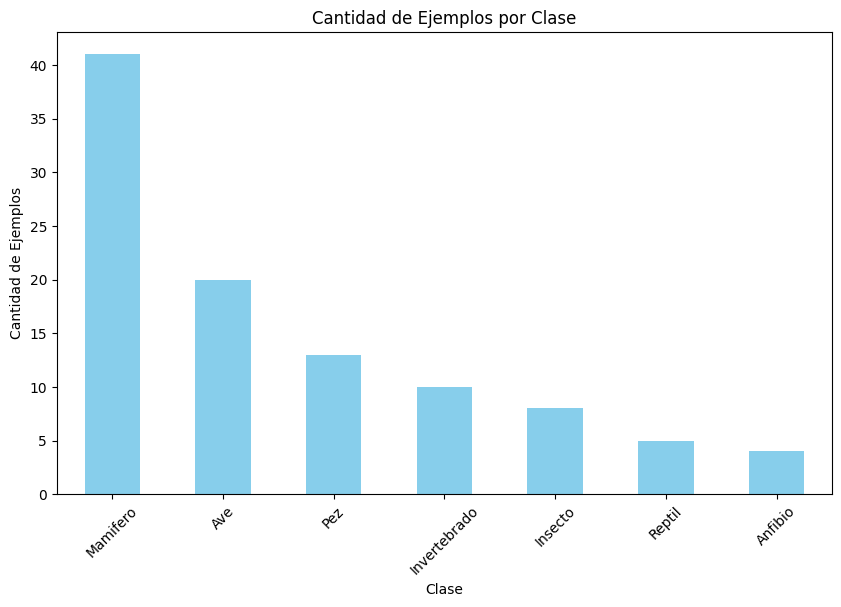

In [ ]:
# cuenta la cantidad de ejemplos por cada valor del atributo Clase
contador = datos['Clase'].value_counts()
print(contador)

# crea gráfico de barras
plt.figure(figsize=(10, 6))
contador.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Ejemplos por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Ejemplos')
plt.xticks(rotation=45)  # rotar las etiquetas del eje x para mayor claridad
plt.show()

Al ver el gráfico nos damos cuenta que existe un desequilibrio de clases. La clase mamífero es la mas frecuente, lo cual podría hacer que al entrenar el perceptrón se base en este tipo y tenga dificiltades al predecir las clases que son menos frecuentes.
Lo ideal sería que las clases esten equilibradas para que el entrenamiento del perceptrón sea el ideal.


*b) Utilice todos los ejemplos para entrenar un perceptrón que sea capaz de reconocer si un animal es un
mamífero. Entrene varias veces si es necesario y verifique que funciona correctamente*

In [ ]:
nColum = list(datos.columns.values)
print(nColum)
print("Cantidad de columnas:", len(nColum))

# Datos de entrenamiento
X = np.array(datos.iloc[:,0:17])
#print(X)

normalizador = preprocessing.StandardScaler()
X = normalizador.fit_transform(X)

# Salida binaria
T = datos['Clase'] == 'Mamifero'
T = np.array(T*1) # convierte a binario
#print(T)




#(X_new, T_new, scaler) = OrdenacionNormalizacion(X, T, '-', 'estadistica')

alfa = 0.05
MAX_ITE = 200

# Entrenamiento
p = Perceptron(alfa, MAX_ITE, draw = False)
p.fit(X_new, T_new)

Y = p.predict(X_new)
#aciertos = sum(Y == T)
nAciertos = sum (Y == T)
print("Numero de aciertos: %.2f" % nAciertos)
print("%% de aciertos: %.2f %%" % (100 * nAciertos/X.shape[0]))


['animal', 'Tiene_Pelo', 'Tiene_Plumas', 'Nace_de_huevo', 'Toma_Leche', 'Vuela', 'Acuatico', 'Depredador', 'Dentado', 'Vertebrado', 'Respira', 'Venenoso', 'Tiene_Aletas', 'Cant_Patas', 'Tiene_Cola', 'Domestico', 'Tamano_Gato', 'Clase']
Cantidad de columnas: 18


ValueError: ignored